In [ ]:
import pandas as pd
import plotly.express as px

Load the dataset into a data frame using Python.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Africa_climate_change.csv')
df.head(10)

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon
5,19800101 000000,NaN,52.0,61.0,45.0,Tunisia
6,19800101 000000,0.0,76.0,97.0,59.0,Senegal
7,19800101 000000,0.0,74.0,95.0,59.0,Senegal
8,19800101 000000,0.0,78.0,93.0,63.0,Senegal
9,19800101 000000,0.0,76.0,91.0,59.0,Senegal


In [ ]:
df_copy = df.copy()

Clean the data as needed.

In [ ]:
df.isnull().sum()

,0
DATE,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


In [ ]:
# What percentage of each column is missing?
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)



DATE        0.000000
PRCP       61.796629
TAVG        1.371729
TMAX       21.710573
TMIN       28.410873
COUNTRY     0.000000
dtype: float64


In [ ]:
#60% of prcp table missing so i dropped
df= df.drop('PRCP',axis=1)


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d %H%M%S')

In [ ]:
# Check missing data for ALL countries
for country in df['COUNTRY'].unique():
    print(f"\n{'='*50}")
    print(f"{country}")
    print(f"{'='*50}")

    country_data = df[df['COUNTRY'] == country].copy()
    country_data['YEAR'] = country_data['DATE'].dt.year

    # Total rows
    print(f"Total rows: {len(country_data)}")

    # Overall missing %
    total_missing = country_data[['TAVG', 'TMAX', 'TMIN']].isnull().sum()
    total_pct = (total_missing / len(country_data) * 100).round(1)
    print(f"\nOverall missing %:")
    print(f"TAVG: {total_pct['TAVG']}%")
    print(f"TMAX: {total_pct['TMAX']}%")
    print(f"TMIN: {total_pct['TMIN']}%")



Tunisia
Total rows: 79301

Overall missing %:
TAVG: 0.0%
TMAX: 21.6%
TMIN: 30.3%

Cameroon
Total rows: 41554

Overall missing %:
TAVG: 0.0%
TMAX: 43.3%
TMIN: 40.9%

Senegal
Total rows: 183262

Overall missing %:
TAVG: 0.8%
TMAX: 17.4%
TMIN: 28.6%

Egypt
Total rows: 149191

Overall missing %:
TAVG: 1.7%
TMAX: 16.0%
TMIN: 19.3%

Angola
Total rows: 11507

Overall missing %:
TAVG: 19.3%
TMAX: 87.7%
TMIN: 84.2%


In [ ]:
# Almost 90 percent of data missing hence, I dropped it
df = df[df['COUNTRY'] != 'Angola']


#Null values
print(df[['TAVG', 'TMAX', 'TMIN']].isnull().sum())

TAVG      4157
TMAX     90819
TMIN    122369
dtype: int64


In [ ]:

df = df.sort_values(['COUNTRY', 'DATE']).reset_index(drop=True)

temp_cols = ['TAVG', 'TMAX', 'TMIN']
df[temp_cols] = df.groupby('COUNTRY')[temp_cols].transform(
    lambda x: x.interpolate(method='linear')
)

df[temp_cols] = df.groupby('COUNTRY')[temp_cols].transform(
    lambda x: x.ffill().bfill()
)

In [ ]:

print(df.isnull().sum())

DATE       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64


#VISUALIZATION

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tunisia_cameroon = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])].copy()

# Group by country and date to get average temp per day (in case of multiple stations)
avg_temp = tunisia_cameroon.groupby(['COUNTRY', 'DATE'])['TAVG'].mean().reset_index()

fig = px.line(avg_temp,
              x='DATE',
              y='TAVG',
              color='COUNTRY',
              title='Average Temperature Fluctuations: Tunisia vs Cameroon (1980-2023)',
              labels={'DATE': 'Year', 'TAVG': 'Average Temperature (°F)', 'COUNTRY': 'Country'},
              template='plotly_white')
# Customize
fig.update_traces(line=dict(width=1))
fig.update_layout(
    hovermode='x unified',
    width=1000,
    height=500
)

fig.show()

##Interpretation
The average temperature range
Tunisia: Very wobbly and is more up and down. With extreme weather conditions very cold and very hot.
Temp: 40-90F

Cameroon: Less seasonal variation as expected in a Tropical climate with a little more stable seasons.
Temp:70-98F

Tunisia maintains its heavy swing across the years and in the 2020s

Cameroon's range gets thinner with no exact change either. With its lowest around 72F

In [ ]:


# Filter for 1980-2005
zoomed_data = avg_temp[(avg_temp['DATE'] >= '1980-01-01') &
                       (avg_temp['DATE'] <= '2005-12-31')]

# Create plot
fig = px.line(zoomed_data,
              x='DATE',
              y='TAVG',
              color='COUNTRY',
              color_discrete_map={'Tunisia': '#E74C3C', 'Cameroon': '#3498DB'})

# Full customization
fig.update_layout(
    title={
        'text': 'Average Temperature Fluctuations: Tunisia vs Cameroon (1980-2005)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    xaxis={
        'title': 'Year',
        'title_font': {'size': 16, 'family': 'Arial'},
        'tickfont': {'size': 12},
        'showgrid': True,
        'gridwidth': 0.5,
        'gridcolor': 'rgba(200, 200, 200, 0.3)',
        'dtick': 'M60',        # Tick every 5 years
        'tickformat': '%Y'
    },
    yaxis={
        'title': 'Average Temperature (°F)',
        'title_font': {'size': 16, 'family': 'Arial'},
        'tickfont': {'size': 12},
        'showgrid': True,
        'gridwidth': 0.5,
        'gridcolor': 'rgba(200, 200, 200, 0.3)',
        'range': [35, 105],
        'dtick': 10,
        'ticksuffix': '°F'
    },
    legend={
        'title': {'text': '<b>Country</b>', 'font': {'size': 14}},
        'font': {'size': 12},
        'bgcolor': 'rgba(255, 255, 255, 0.8)',
        'bordercolor': 'gray',
        'borderwidth': 1
    },
    hovermode='x unified',
    template='plotly_white',
    width=1400,
    height=650,
    plot_bgcolor='rgba(250, 250, 250, 0.5)'
)

# Line styling
fig.update_traces(line={'width': 1.2})

fig.show()

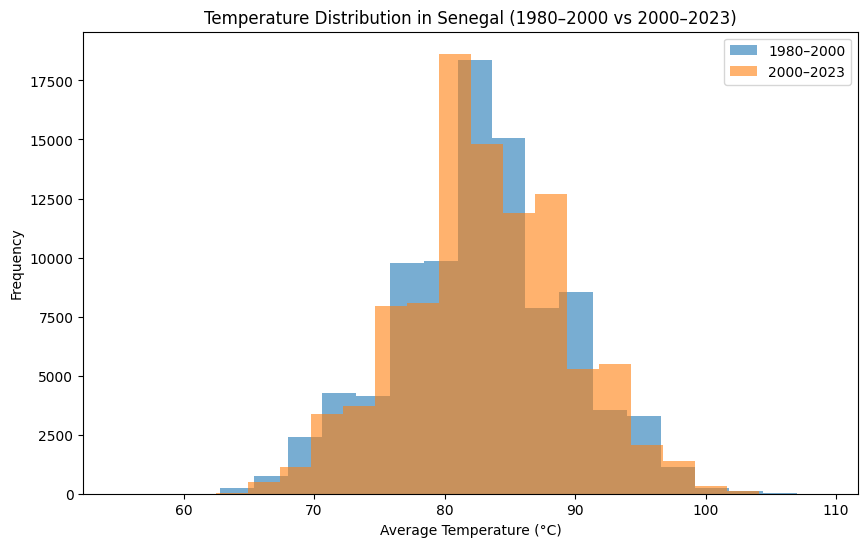

In [ ]:
# Filter for Senegal only
senegal = df[df['COUNTRY'] == 'Senegal'].copy()

# Create two time periods
period1 = senegal[(senegal['DATE'] >= '1980-01-01') & (senegal['DATE'] <= '2000-12-31')]
period2 = senegal[(senegal['DATE'] >= '2000-01-01') & (senegal['DATE'] <= '2023-12-31')]



plt.figure(figsize=(10,6))

plt.hist(period1['TAVG'], bins=20, alpha=0.6, label='1980–2000')
plt.hist(period2['TAVG'], bins=20, alpha=0.6, label='2000–2023')

plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution in Senegal (1980–2000 vs 2000–2023)')
plt.legend()
plt.show()

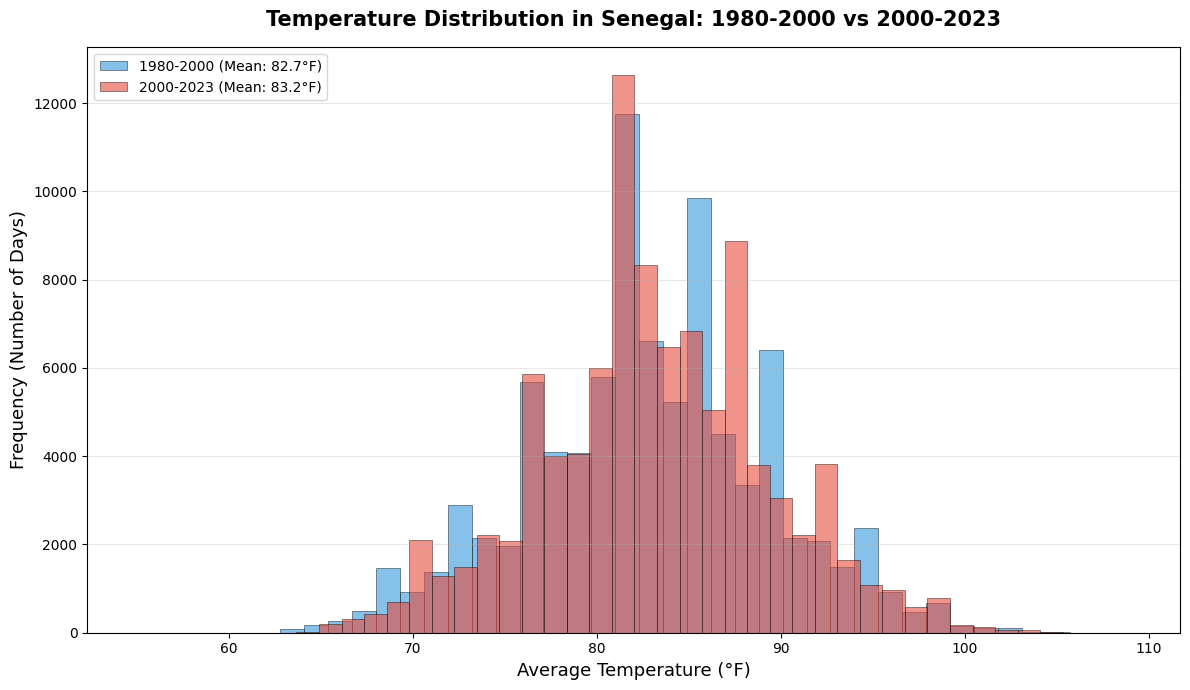

1980-2000 Mean: 82.75°F
2000-2023 Mean: 83.17°F
Change: +0.43°F


In [ ]:
import matplotlib.pyplot as plt

# Filter for Senegal only
senegal = df[df['COUNTRY'] == 'Senegal'].copy()

# Create two time periods
period1 = senegal[(senegal['DATE'] >= '1980-01-01') & (senegal['DATE'] <= '2000-12-31')]
period2 = senegal[(senegal['DATE'] >= '2000-01-01') & (senegal['DATE'] <= '2023-12-31')]



# Calculate means
mean1 = period1['TAVG'].mean()
mean2 = period2['TAVG'].mean()

# Create figure
plt.figure(figsize=(12, 7))

# Plot histograms
plt.hist(period1['TAVG'], bins=40, alpha=0.6, color='#3498DB',
         label=f'1980-2000 (Mean: {mean1:.1f}°F)', edgecolor='black', linewidth=0.5)
plt.hist(period2['TAVG'], bins=40, alpha=0.6, color='#E74C3C',
         label=f'2000-2023 (Mean: {mean2:.1f}°F)', edgecolor='black', linewidth=0.5)


# Labels and title
plt.xlabel('Average Temperature (°F)', fontsize=13)  # Fixed: °F not °C
plt.ylabel('Frequency (Number of Days)', fontsize=13)
plt.title('Temperature Distribution in Senegal: 1980-2000 vs 2000-2023',
          fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

plt.show()

# Print statistics
print(f"1980-2000 Mean: {mean1:.2f}°F")
print(f"2000-2023 Mean: {mean2:.2f}°F")
print(f"Change: {mean2 - mean1:+.2f}°F")

##My Interpretation for Senegal

####Common Temperature:
"Senegal's temperature distribution is centered around 83°F, with this being the most common temperature range for both time periods. The peak represents the typical daily temperature experienced throughout the year."

#### Climate Warming Evidence:

"The mean temperature increased from 82.7°F (1980-2000) to 83.2°F (2000-2023), representing a +0.5°F warming trend over approximately 23 years.

####Distribution Shift:

"The entire temperature distribution has shifted rightward (warmer). This is visible in the slight displacement of the red histogram peak compared to the blue histogram, indicating that warmer temperatures have become more frequent."

####Changes in Extremes:

"Notably, the frequency of cooler days (67-75°F) has decreased, as evidenced by taller blue bars on the left side of the distribution. Conversely, extremely hot days (90-100°F) have become more common in the recent period, with red bars extending further right and showing higher frequency in the tail of the distribution."

####Climate Stability:

"Both periods show similar distribution shapes (bell curves), suggesting that while average temperatures have increased, the overall pattern of seasonal variation remains consistent. Senegal continues to experience the same range of temperature variability, just at a warmer baseline."



In [ ]:


avg_by_country = df.groupby('COUNTRY')['TAVG'].mean().reset_index()
avg_by_country = avg_by_country.sort_values('TAVG', ascending=False)

fig = px.bar(avg_by_country,
             x='COUNTRY',
             y='TAVG',
             title='Average Temperature by Country (1980-2023)',
             labels={'TAVG': 'Average Temperature (°F)', 'COUNTRY': 'Country'},
             color='COUNTRY',
             color_discrete_sequence=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12'],
             text='TAVG')

fig.update_traces(texttemplate='%{text:.2f}°F', textposition='outside')
fig.update_layout(
    title_x=0.5,
    showlegend=False,
    template='plotly_white',
    width=900,
    height=600
)

fig.show()